--- Question 1: Random Forest on Iris Dataset ---
Random Forest Classifier Accuracy: 1.0000
--------------------------------------------------

--- Question 2: SVM on Breast Cancer Dataset ---
SVM (Linear Kernel) Accuracy: 0.9766

Confusion Matrix:
[[ 61   2]
 [  2 106]]


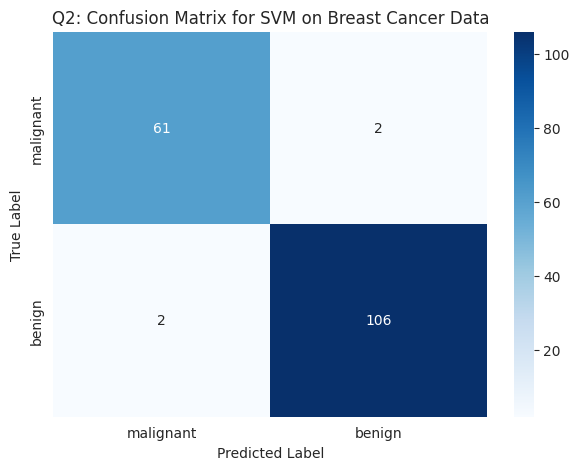

--------------------------------------------------

--- Question 3: Random Forest on Simulated Student Data ---
Random Forest Accuracy on Student Pass/Fail Data: 0.6667

Feature Importance:
study_hours    0.405405
attendance     0.310811
marks          0.283784
dtype: float64


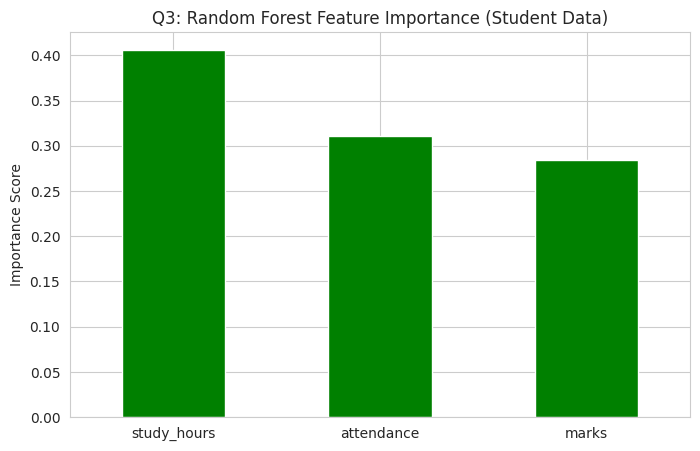

--------------------------------------------------

--- Question 4: SVM on Digits Dataset ---
SVM (RBF Kernel) Accuracy on Digits Dataset: 0.9796

Total Misclassified Samples: 11
Visualizing up to 5 Misclassified Samples:


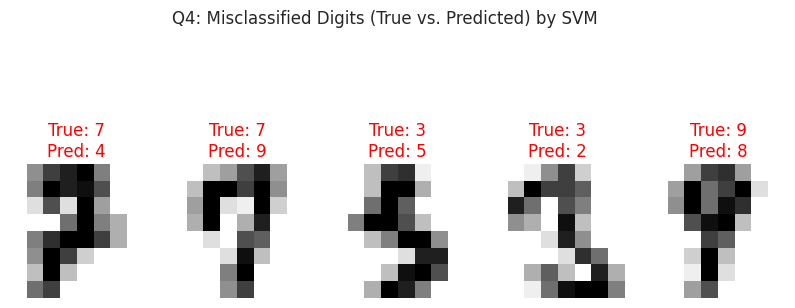

--------------------------------------------------

--- Question 5: Compare RF vs SVM on Wine Dataset ---
Random Forest Accuracy on Wine Dataset: 1.0000
SVM (RBF Kernel) Accuracy on Wine Dataset: 0.9815

Conclusion: **Random Forest Classifier** performed better on the Wine dataset.
--------------------------------------------------


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (
    load_iris,
    load_breast_cancer,
    load_digits,
    load_wine
)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
sns.set_style('whitegrid')


print("--- Question 1: Random Forest on Iris Dataset ---")


iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE
)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf_clf.fit(X_train, y_train)

y_pred_rf_iris = rf_clf.predict(X_test)

accuracy_rf_iris = accuracy_score(y_test, y_pred_rf_iris)
print(f"Random Forest Classifier Accuracy: {accuracy_rf_iris:.4f}")
print("-" * 50)


print("\n--- Question 2: SVM on Breast Cancer Dataset ---")

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf_linear = SVC(kernel='linear', random_state=RANDOM_STATE)
svm_clf_linear.fit(X_train_scaled, y_train)

y_pred_svm_cancer = svm_clf_linear.predict(X_test_scaled)

accuracy_svm_cancer = accuracy_score(y_test, y_pred_svm_cancer)
conf_mat_cancer = confusion_matrix(y_test, y_pred_svm_cancer)

print(f"SVM (Linear Kernel) Accuracy: {accuracy_svm_cancer:.4f}")
print("\nConfusion Matrix:")
print(conf_mat_cancer)

plt.figure(figsize=(7, 5))
sns.heatmap(
    conf_mat_cancer,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=cancer.target_names,
    yticklabels=cancer.target_names
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Q2: Confusion Matrix for SVM on Breast Cancer Data')
plt.show()
print("-" * 50)


print("\n--- Question 3: Random Forest on Simulated Student Data ---")

data = {
    'study_hours': [2, 3, 5, 6, 8, 9, 1, 4, 7, 10, 3, 5, 7, 2, 8, 4, 6, 9],
    'attendance': [60, 65, 80, 85, 90, 70, 50, 75, 95, 88, 70, 82, 92, 62, 88, 78, 86, 91],
    'marks': [45, 55, 70, 78, 85, 65, 40, 68, 90, 82, 60, 72, 88, 50, 80, 75, 76, 95],
    'result': ['Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass']
}
df = pd.DataFrame(data)
df['result'] = df['result'].apply(lambda x: 1 if x == 'Pass' else 0)

X = df[['study_hours', 'attendance', 'marks']]
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

rf_clf_students = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf_clf_students.fit(X_train, y_train)


y_pred_rf_students = rf_clf_students.predict(X_test)

accuracy_rf_students = accuracy_score(y_test, y_pred_rf_students)
print(f"Random Forest Accuracy on Student Pass/Fail Data: {accuracy_rf_students:.4f}")

feature_importances = pd.Series(
    rf_clf_students.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_importances)

plt.figure(figsize=(8, 5))
feature_importances.plot(kind='bar', color='green')
plt.title('Q3: Random Forest Feature Importance (Student Data)')
plt.ylabel('Importance Score')
plt.xticks(rotation=0)
plt.show()
print("-" * 50)



print("\n--- Question 4: SVM on Digits Dataset ---")

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf_rbf_digits = SVC(kernel='rbf', gamma='scale', random_state=RANDOM_STATE)
svm_clf_rbf_digits.fit(X_train_scaled, y_train)

y_pred_svm_digits = svm_clf_rbf_digits.predict(X_test_scaled)

accuracy_svm_digits = accuracy_score(y_test, y_pred_svm_digits)
print(f"SVM (RBF Kernel) Accuracy on Digits Dataset: {accuracy_svm_digits:.4f}")

misclassified_indices = np.where(y_pred_svm_digits != y_test)[0]

print(f"\nTotal Misclassified Samples: {len(misclassified_indices)}")
print("Visualizing up to 5 Misclassified Samples:")

plt.figure(figsize=(10, 4))
for plot_index, wrong_index in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, plot_index + 1)
    plt.imshow(X_test[wrong_index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'True: {y_test[wrong_index]}\nPred: {y_pred_svm_digits[wrong_index]}', color='red')
    plt.axis('off')

plt.suptitle('Q4: Misclassified Digits (True vs. Predicted) by SVM', y=1.05)
plt.show()
print("-" * 50)



print("\n--- Question 5: Compare RF vs SVM on Wine Dataset ---")

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_clf_wine = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf_clf_wine.fit(X_train, y_train) # Use unscaled data

svm_clf_wine = SVC(kernel='rbf', random_state=RANDOM_STATE)
svm_clf_wine.fit(X_train_scaled, y_train) # Use scaled data

rf_pred_wine = rf_clf_wine.predict(X_test)
svm_pred_wine = svm_clf_wine.predict(X_test_scaled)

rf_accuracy_wine = accuracy_score(y_test, rf_pred_wine)
svm_accuracy_wine = accuracy_score(y_test, svm_pred_wine)

print(f"Random Forest Accuracy on Wine Dataset: {rf_accuracy_wine:.4f}")
print(f"SVM (RBF Kernel) Accuracy on Wine Dataset: {svm_accuracy_wine:.4f}")

if rf_accuracy_wine > svm_accuracy_wine:
    conclusion = "**Random Forest Classifier** performed better on the Wine dataset."
elif svm_accuracy_wine > rf_accuracy_wine:
    conclusion = "**SVM Classifier** performed better on the Wine dataset."
else:
    conclusion = "Both models performed equally well on the Wine dataset."

print(f"\nConclusion: {conclusion}")
print("-" * 50)